# Rossman Store Sales Project EDA Notebook

In [1]:
%load_ext autoreload
%autoreload 2

import os

os.chdir("../..")

from src.config.config import *
from src.data.make_dataset import make_dataset
import seaborn as sns

In [2]:
# get_config loads the conf/config.yaml
conf = get_config()

# make_dataset uses the data path from config to load the two datasets
data_train, data_test = make_dataset(conf.DATA_PATH)

Loading config file: "./conf/config.yaml" 
Train and test datasets saved!


In [3]:
print(data_train.shape, data_test.shape)

(844392, 3) (41088, 2)


In [4]:
data_train.head()

Promo  SchoolHoliday     y
Store ds                                    
1     2013-01-02      0              1  5530
      2013-01-03      0              1  4327
      2013-01-04      0              1  4486
      2013-01-05      0              1  4997
      2013-01-07      1              1  7176

In [5]:
data_test.head()

Promo  SchoolHoliday
Store ds                              
1     2015-08-01      0              1
      2015-08-02      0              1
      2015-08-03      1              1
      2015-08-04      1              1
      2015-08-05      1              1

In [6]:
data_train.dtypes, data_test.dtypes

(Promo            Int64
 SchoolHoliday    Int64
 y                Int64
 dtype: object,
 Promo            Int64
 SchoolHoliday    Int64
 dtype: object)

In [7]:
# Check for nulls
data_train.isna().sum(), data_test.isna().sum()

(Promo            0
 SchoolHoliday    0
 y                0
 dtype: int64,
 Promo            0
 SchoolHoliday    0
 dtype: int64)

In [8]:
# All entries appear once and there are no duplicates in train
(data_train.groupby(["Store", "ds"]).count() == 1).mean()

Promo            1.0
SchoolHoliday    1.0
y                1.0
dtype: Float64

In [9]:
# All entries appear once and there are no duplicates in test
(data_test.groupby(["Store", "ds"]).count() == 1).mean()

Promo            1.0
SchoolHoliday    1.0
dtype: Float64

In [10]:
# Data range is between Jan 2013 and July 2015 for Training
data_train.index.levels[1].min(), data_train.index.levels[1].max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [11]:
# Data range is between August 2015 and September 2015 for Testing
data_test.index.levels[1].min(), data_test.index.levels[1].max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [12]:
# Check stores in train and test and their commonality
stores_train = data_train.index.levels[0]
stores_test = data_test.index.levels[0]
n_stores_train = len(stores_train)
n_stores_test = len(stores_test)
print(f"Number of stores found in train dataset is {n_stores_train}")
print(f"Number of stores found in test dataset is {n_stores_test}")
print(
    f"{stores_train.isin(stores_test).sum()} stores in test set out of {n_stores_test} is also found in train"
)

Number of stores found in train dataset is 1115
Number of stores found in test dataset is 856
856 stores in test set out of 856 is also found in train


In [13]:
# How a sample train dataset looks like for store 1
data_train.loc[1]

,Promo,SchoolHoliday,y
ds,,,
2013-01-02,0,1,5530
2013-01-03,0,1,4327
2013-01-04,0,1,4486
2013-01-05,0,1,4997
2013-01-07,1,1,7176
...,...,...,...
2015-07-27,1,1,6102
2015-07-28,1,1,5011
2015-07-29,1,1,4782


In [14]:
data_train.loc[1]

,Promo,SchoolHoliday,y
ds,,,
2013-01-02,0,1,5530
2013-01-03,0,1,4327
2013-01-04,0,1,4486
2013-01-05,0,1,4997
2013-01-07,1,1,7176
...,...,...,...
2015-07-27,1,1,6102
2015-07-28,1,1,5011
2015-07-29,1,1,4782


In [15]:
sns.set_theme(style="dark")
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


In [16]:
df_graph = data_train.reset_index()
df_graph["month"] = df_graph["ds"].dt.month
df_graph["month-nm"] = df_graph["ds"].dt.month_name().str[0:3]
df_graph["year"] = df_graph["ds"].dt.year
df_store_list = df_graph["Store"].unique()[0:25]

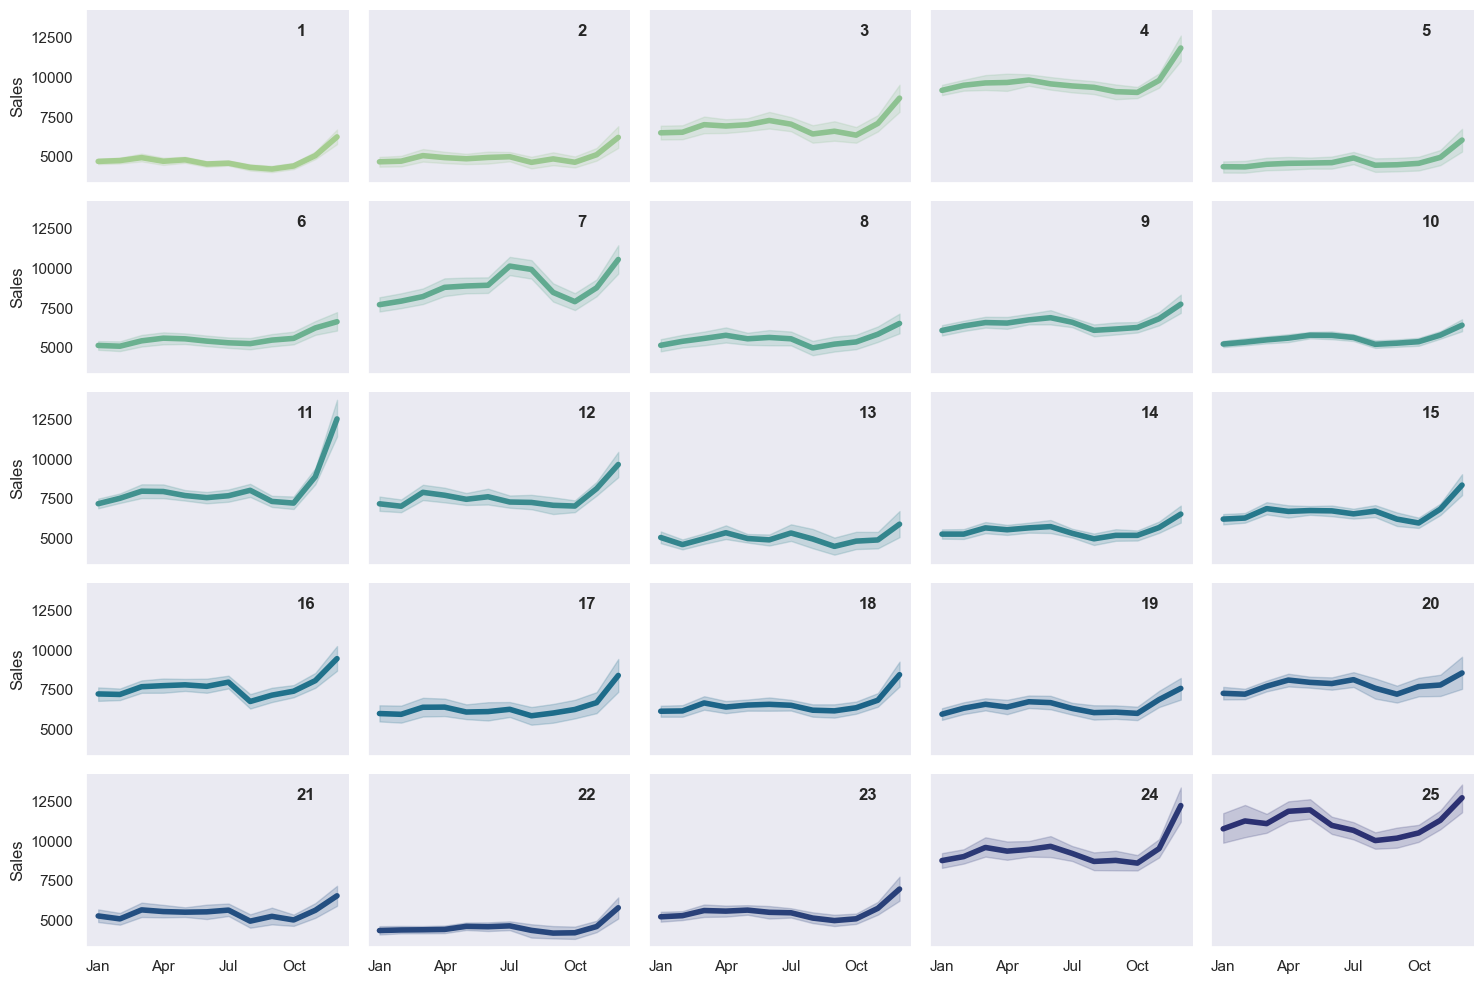

In [17]:
# Sales throughout the year for each store
df_graph_subset = df_graph[df_graph["Store"].isin(df_store_list)]
# Plot each year's time series in its own facet
g = sns.relplot(
    data=df_graph_subset,
    x="month-nm",
    y="y",
    col="Store",
    hue="Store",
    kind="line",
    palette="crest",
    linewidth=4,
    zorder=5,
    col_wrap=5,
    height=2,
    aspect=1.5,
    legend=False,
)

for ax_num, store in enumerate(df_store_list):

    # Add the title as an annotation within the plot
    g.axes[ax_num].text(
        0.8, 0.85, store, transform=g.axes[ax_num].transAxes, fontweight="bold"
    )

# Reduce the frequency of the x axis ticks
g.axes[ax_num].set_xticks(g.axes[ax_num].get_xticks()[::3])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "Sales")
g.tight_layout();